# Sentiment Analysis - Phân tích trạng thái tình cảm của khách hàng - Foody.vn

### Business Objective/Problem
Foody.vn là một kênh phối hợp với các nhà hàng/quán ăn bán thực phẩm online. 
Chúng ta có thể lên đây để xem các đánh giá, nhận xét cũng như đặt mua thực phẩm.
Từ những đánh giá của khách hàng, vấn đề được đưa ra là làm sao để các nhà hàng/ quán ăn hiểu được khách hàng rõ hơn, biết họ đánh giá về mình như thế nào để cải thiện hơn trong dịch vụ/ sản phẩm.

## Triển khai dự án

### Bước 1: Business Understanding
- Dựa vào đánh giá khen hay chê của khách hàng cho từng quán ăn mà quán ăn đó có thể cải thiện chất lượng dịch vụ
- Mục tiêu là xây dựng được mô hình phân loại nhận xét tích cực hay tiêu cực

### Bước 2: Data Understanding/ Acquire
- Data được lấy từ trang Foody.vn có từ 2 nguồn đó là:
    + Bằng cách xử dụng scapy để crawl data được hơn 4500 dòng dữ liệu
    + Data được giáo viên phụ trách cung cấp thêm (40k dòng dữ liệu).

#### Importing Necesseties 

In [4]:
!pip install underthesea

     |████████████████████████████████| 7.6 MB 4.4 MB/s 
     |████████████████████████████████| 965 kB 47.1 MB/s 
     |████████████████████████████████| 235 kB 45.9 MB/s 
     |████████████████████████████████| 581 kB 54.1 MB/s 


In [5]:
!pip install demoji

     |████████████████████████████████| 42 kB 809 kB/s 


In [6]:
!pip install pyvi

     |████████████████████████████████| 8.5 MB 4.7 MB/s 


In [7]:
!pip install lazypredict

     |████████████████████████████████| 72 kB 786 kB/s 
     |████████████████████████████████| 1.2 MB 11.0 MB/s 
     |████████████████████████████████| 10.1 MB 42.7 MB/s 
     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 248 kB 49.7 MB/s 
     |████████████████████████████████| 6.8 MB 20.6 MB/s 
     |████████████████████████████████| 269 kB 50.6 MB/s 
     |████████████████████████████████| 14.5 MB 21 kB/s 
     |████████████████████████████████| 302 kB 43.2 MB/s 
     |████████████████████████████████| 25.9 MB 1.7 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=2ca67579606f7b404d3dbc5d315371948e4cbd875269229e86c0a91145f6fdb1
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully un

In [1]:
import pandas as pd
import json
import numpy as np
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import re
import math
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

import time
import operator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
import lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/DSML_k274_PhamSyCang/Week4/K274_DS_PhamSyCang/Source")
os.listdir()

Mounted at /content/drive


['foody2.json',
 'data_Foody.csv',
 'files',
 'Foody_review_streamlit',
 'crawl foody data source code',
 'final_foody.csv',
 'final_under_sampling.csv',
 'README.md',
 'final_over_sampling.csv',
 'rating_boolean.png',
 'DoAn_PhamSyCang.ipynb']

In [3]:
f= open('foody2.json')
data= json.load(f)

In [4]:
data

[{'Atmosphere_score_cmt': 10,
  'Comment': 'Cơm gà ngon nhất mình từng ăn trên Food!\n\nNgon từ miếng gà ngọt thịt, da giòn tan, nước sốt đậm đà kẹo kẹo. \n\nCơm nấu nước luộc gà ngon tự nhiên! Canh rong biển chất lượng. \n\nNói chung là 10/10 các bạn ạ. Rất ngon rất đáng tiền!',
  'Followers': 330,
  'Food_score_cmt': 10,
  'Position_score_cmt': 10,
  'Price_score_cmt': 10,
  'Rating': 10,
  'ResId': 1030399,
  'ResName': 'Cơm Gà Xối Mỡ - Chợ Ông Địa',
  'Res_atmosphere_score': '9.0',
  'Res_food_score': '9.0',
  'Res_pos_score': '10.0',
  'Res_price_score': '9.0',
  'Res_rating': '9.1',
  'Res_services_score': '8.5',
  'RevId': 8339169,
  'Services_score_cmt': 10,
  'Total_reviews': 18,
  'UserId': 821172,
  'UserName': 'Bao Tran Le',
  'district': 'Quận Tân Bình',
  'region': 'TP. HCM',
  'streetAddress': '373/82 Lý Thường Kiệt, P. 8'},
 {'Atmosphere_score_cmt': 8,
  'Comment': 'Bửa trước mình đi với bạn lần đầu ăn ở quán. Tầm 18h, quán khá đông, phục vụ nhanh và dễ thương.\n\nMình 

In [4]:
df = pd.DataFrame(data)
df.head(1)

RevId  UserId     UserName  Rating  \
0  8339169  821172  Bao Tran Le   10.00   

                                             Comment    ResId  \
0  Cơm gà ngon nhất mình từng ăn trên Food!\n\nNg...  1030399   

                       ResName                streetAddress       district  \
0  Cơm Gà Xối Mỡ - Chợ Ông Địa  373/82 Lý Thường Kiệt, P. 8  Quận Tân Bình   

    region  ... Res_food_score Res_atmosphere_score Res_services_score  \
0  TP. HCM  ...            9.0                  9.0                8.5   

  Food_score_cmt Services_score_cmt Atmosphere_score_cmt  Position_score_cmt  \
0             10                 10                   10                  10   

   Price_score_cmt  Total_reviews  Followers  
0               10             18        330  

[1 rows x 23 columns]

In [5]:
df1 = pd.read_csv('data_Foody.csv')
df1.head(1)

Unnamed: 0               restaurant  \
0           0  Good Morning Restaurant   

                                         review_text  review_score  
0  Pizza phong cách Ý. Ngán hải sản nên cả nhà gh...          8.20

In [6]:
df.shape

(4701, 23)

In [7]:
df1.shape

(39925, 4)

### Implement some helper functions

In [36]:
def process_text(text, emoji_dict, teen_dict, wrong_lst):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### DEL wrong words   
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '                    
    document = new_sentence  
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [37]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [38]:
# có thể bổ sung thêm các từ: chẳng, chả...
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i= 0
    if 'không' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'không':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    elif 'chẳng' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'chẳng':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    elif 'chả' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'chả':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [39]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [40]:
def remove_stopword(text, stopwords):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [41]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [42]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[\n\r]', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}', '', text)
    text = re.sub('[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+', '', text)
    return text

In [43]:
##LOAD EMOJICON
file = open('files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [44]:
def WordCloudForRating (dataFrame, rating, type ='rating_round'):
    df =  (dataFrame[dataFrame[type] == rating]['comment'])
    corpus = ''
    
    for mem in df:
        corpus += str(mem)
    
    corpus = re.sub('READ MORE', '', corpus)
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey',
                          stopwords = stopwords_lst,  min_font_size = 10).generate(corpus)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud:  ' + str(rating) + ' star reviews')
    plt.tight_layout(pad = 0) 
  
    plt.show() 

#### Merge dataframe

In [45]:
df_review = df.loc[:, ['ResName','Rating', 'Comment']]
df_review1 = df1.loc[:, ['restaurant','review_score','review_text']]
df_review.columns = ['restaurant', 'rating', 'comment']
df_review1.columns = ['restaurant', 'rating', 'comment']
frames = [df_review, df_review1]
reviews = pd.concat(frames)
reviews.shape

(44626, 3)

In [46]:
reviews.head()

restaurant  rating  \
0                     Cơm Gà Xối Mỡ - Chợ Ông Địa   10.00   
1  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    7.60   
2  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    6.80   
3                  Trà Sữa Te Amo - Dương Bá Trạc    4.80   
4      Bếp Hảo Hảo - Đỉnh Cao Ăn Vặt - Võ Văn Tần   10.00   

                                             comment  
0  Cơm gà ngon nhất mình từng ăn trên Food!\n\nNg...  
1  Bửa trước mình đi với bạn lần đầu ăn ở quán. T...  
2  Món mực tươi chiên siêu ngon, thơm mùi tỏi chá...  
3  Lần đầu mình mua ở chi nhánh Q5, mua 2 lần đều...  
4  Chân gà vị chua cay ăn ok nhé . Cóc giòn , ăn ...

### Bước 3: Data preparation/ Prepare

In [47]:
reviews.isnull().sum()

restaurant    0
rating        0
comment       0
dtype: int64

In [48]:
#drop all null comment rows
reviews = reviews.dropna(subset=['comment'])

In [49]:
## drop na rating -> to test
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44626 entries, 0 to 39924
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   restaurant  44626 non-null  object 
 1   rating      44626 non-null  float64
 2   comment     44626 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [50]:
reviews.describe()

rating
count 44626.00
mean      7.32
std       2.23
min       1.00
25%       7.00
50%       8.00
75%       8.60
max      10.00

In [51]:
reviews.duplicated().sum()

144

In [52]:
reviews.drop_duplicates(inplace=True)

In [53]:
reviews.duplicated().sum()

0

In [54]:
reviews = reviews.reset_index(drop=True)

In [55]:
reviews.shape

(44482, 3)

In [56]:

reviews['rating'].value_counts()

8.20     6938
10.00    3731
7.30     3591
8.00     2600
7.40     2021
9.00     1639
7.00     1608
1.00     1607
8.40     1422
8.60     1334
8.80     1201
7.20     1156
7.60     1146
9.60     1064
3.20     1063
7.80     1061
9.20      981
9.40      958
9.80      844
6.80      796
8.10      741
4.40      610
6.60      588
5.00      477
3.40      474
6.40      464
6.00      454
4.20      446
6.20      400
2.60      351
3.00      224
3.80      222
4.00      217
5.80      195
2.80      192
1.80      185
3.60      172
4.60      151
2.20      144
2.00      138
5.60      133
5.40      124
4.80      124
2.40      113
5.20      106
1.60      104
1.40      100
1.20       72
Name: rating, dtype: int64

In [57]:
##round up rating

reviews['rating_round'] = reviews['rating'].apply(np.ceil)
reviews.head()

restaurant  rating  \
0                     Cơm Gà Xối Mỡ - Chợ Ông Địa   10.00   
1  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    7.60   
2  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    6.80   
3                  Trà Sữa Te Amo - Dương Bá Trạc    4.80   
4      Bếp Hảo Hảo - Đỉnh Cao Ăn Vặt - Võ Văn Tần   10.00   

                                             comment  rating_round  
0  Cơm gà ngon nhất mình từng ăn trên Food!\n\nNg...         10.00  
1  Bửa trước mình đi với bạn lần đầu ăn ở quán. T...          8.00  
2  Món mực tươi chiên siêu ngon, thơm mùi tỏi chá...          7.00  
3  Lần đầu mình mua ở chi nhánh Q5, mua 2 lần đều...          5.00  
4  Chân gà vị chua cay ăn ok nhé . Cóc giòn , ăn ...         10.00

In [58]:
reviews['rating_round'].value_counts()

9.00     13275
8.00     11575
10.00     7578
7.00      3856
4.00      2148
5.00      1808
1.00      1607
3.00      1024
6.00      1012
2.00       599
Name: rating_round, dtype: int64

Text(0.5, 1.0, 'Proportion Target Class')

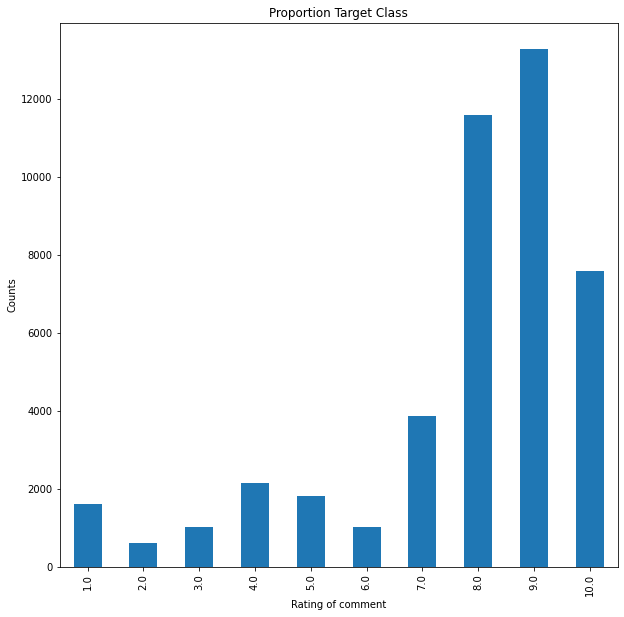

In [59]:
plt.figure(figsize=(10,10))
reviews["rating_round"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating of comment")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

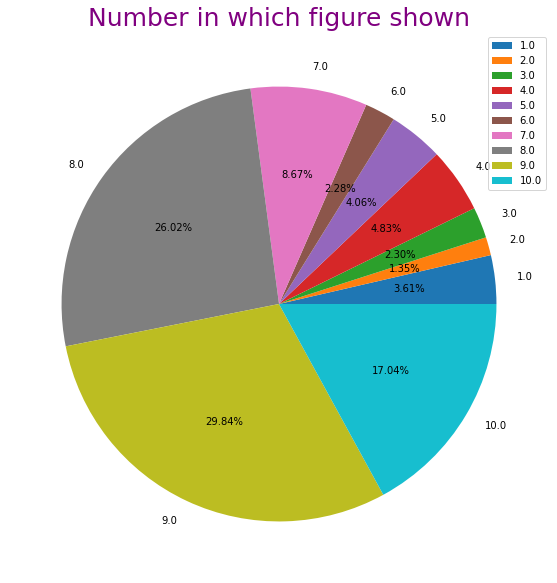

In [60]:
plt.figure(figsize=(10,10))
ax =reviews.rating_round.value_counts().sort_index()
labels=reviews['rating_round'].value_counts().sort_index().index
plt.pie(ax,labels=labels,autopct='%.2f%%')
plt.title("Number in which figure shown",fontsize=25,color='purple')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distplot of rating round')

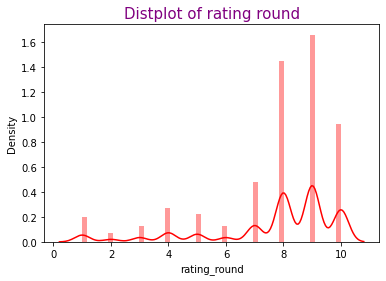

In [61]:
sns.distplot(reviews.rating_round, color = 'red')
plt.title("Distplot of rating round",fontsize=15,color='purple')

In [62]:
reviews.describe()

rating  rating_round
count 44482.00      44482.00
mean      7.32          7.74
std       2.23          2.25
min       1.00          1.00
25%       7.00          7.00
50%       8.00          8.00
75%       8.60          9.00
max      10.00         10.00

### Clean comment column

In [63]:
reviews['comment_clear_text'] = reviews['comment'].apply(clean_text)
reviews.head()

restaurant  rating  \
0                     Cơm Gà Xối Mỡ - Chợ Ông Địa   10.00   
1  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    7.60   
2  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    6.80   
3                  Trà Sữa Te Amo - Dương Bá Trạc    4.80   
4      Bếp Hảo Hảo - Đỉnh Cao Ăn Vặt - Võ Văn Tần   10.00   

                                             comment  rating_round  \
0  Cơm gà ngon nhất mình từng ăn trên Food!\n\nNg...         10.00   
1  Bửa trước mình đi với bạn lần đầu ăn ở quán. T...          8.00   
2  Món mực tươi chiên siêu ngon, thơm mùi tỏi chá...          7.00   
3  Lần đầu mình mua ở chi nhánh Q5, mua 2 lần đều...          5.00   
4  Chân gà vị chua cay ăn ok nhé . Cóc giòn , ăn ...         10.00   

                                  comment_clear_text  
0  cơm gà ngon nhất mình từng ăn trên food  ngon ...  
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...  
2  món mực tươi chiên siêu ngon thơm mùi tỏi cháy...  
3  lần đầu mình mua ở chi nhánh  mua  lần đều rất...  
4  chân gà vị chua cay ăn ok nhé  cóc giòn  ăn kè...

In [64]:
reviews_processtext = [process_text(review, emoji_dict, teen_dict, wrong_lst) for review in reviews['comment_clear_text']]

In [65]:
reviews['processtext'] = reviews_processtext

In [66]:
reviews.head()

restaurant  rating  \
0                     Cơm Gà Xối Mỡ - Chợ Ông Địa   10.00   
1  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    7.60   
2  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    6.80   
3                  Trà Sữa Te Amo - Dương Bá Trạc    4.80   
4      Bếp Hảo Hảo - Đỉnh Cao Ăn Vặt - Võ Văn Tần   10.00   

                                             comment  rating_round  \
0  Cơm gà ngon nhất mình từng ăn trên Food!\n\nNg...         10.00   
1  Bửa trước mình đi với bạn lần đầu ăn ở quán. T...          8.00   
2  Món mực tươi chiên siêu ngon, thơm mùi tỏi chá...          7.00   
3  Lần đầu mình mua ở chi nhánh Q5, mua 2 lần đều...          5.00   
4  Chân gà vị chua cay ăn ok nhé . Cóc giòn , ăn ...         10.00   

                                  comment_clear_text  \
0  cơm gà ngon nhất mình từng ăn trên food  ngon ...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu ngon thơm mùi tỏi cháy...   
3  lần đầu mình mua ở chi nhánh  mua  lần đều rất...   
4  chân gà vị chua cay ăn ok nhé  cóc giòn  ăn kè...   

                                         processtext  
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...  
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...  
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...  
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...  
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...

In [67]:
reviews_convertunicode = [covert_unicode(review) for review in reviews_processtext]

In [68]:
reviews['conver_unicode'] = reviews_convertunicode
reviews.head()

restaurant  rating  \
0                     Cơm Gà Xối Mỡ - Chợ Ông Địa   10.00   
1  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    7.60   
2  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    6.80   
3                  Trà Sữa Te Amo - Dương Bá Trạc    4.80   
4      Bếp Hảo Hảo - Đỉnh Cao Ăn Vặt - Võ Văn Tần   10.00   

                                             comment  rating_round  \
0  Cơm gà ngon nhất mình từng ăn trên Food!\n\nNg...         10.00   
1  Bửa trước mình đi với bạn lần đầu ăn ở quán. T...          8.00   
2  Món mực tươi chiên siêu ngon, thơm mùi tỏi chá...          7.00   
3  Lần đầu mình mua ở chi nhánh Q5, mua 2 lần đều...          5.00   
4  Chân gà vị chua cay ăn ok nhé . Cóc giòn , ăn ...         10.00   

                                  comment_clear_text  \
0  cơm gà ngon nhất mình từng ăn trên food  ngon ...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu ngon thơm mùi tỏi cháy...   
3  lần đầu mình mua ở chi nhánh  mua  lần đều rất...   
4  chân gà vị chua cay ăn ok nhé  cóc giòn  ăn kè...   

                                         processtext  \
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...   
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...   
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...   

                                      conver_unicode  
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...  
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...  
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...  
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...  
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...

In [69]:
reviews_specialcode = [process_special_word(review) for review in reviews_convertunicode]

In [70]:
reviews['conver_special_code'] = reviews_specialcode
reviews.head()

restaurant  rating  \
0                     Cơm Gà Xối Mỡ - Chợ Ông Địa   10.00   
1  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    7.60   
2  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    6.80   
3                  Trà Sữa Te Amo - Dương Bá Trạc    4.80   
4      Bếp Hảo Hảo - Đỉnh Cao Ăn Vặt - Võ Văn Tần   10.00   

                                             comment  rating_round  \
0  Cơm gà ngon nhất mình từng ăn trên Food!\n\nNg...         10.00   
1  Bửa trước mình đi với bạn lần đầu ăn ở quán. T...          8.00   
2  Món mực tươi chiên siêu ngon, thơm mùi tỏi chá...          7.00   
3  Lần đầu mình mua ở chi nhánh Q5, mua 2 lần đều...          5.00   
4  Chân gà vị chua cay ăn ok nhé . Cóc giòn , ăn ...         10.00   

                                  comment_clear_text  \
0  cơm gà ngon nhất mình từng ăn trên food  ngon ...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu ngon thơm mùi tỏi cháy...   
3  lần đầu mình mua ở chi nhánh  mua  lần đều rất...   
4  chân gà vị chua cay ăn ok nhé  cóc giòn  ăn kè...   

                                         processtext  \
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...   
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...   
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...   

                                      conver_unicode  \
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...   
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...   
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...   

                                 conver_special_code  
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...  
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...  
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...  
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...  
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...

In [71]:
reviews_postag_thesea = [process_postag_thesea(review) for review in reviews_specialcode]

In [72]:
reviews['postag_thesea'] = reviews_postag_thesea
reviews.head()

restaurant  rating  \
0                     Cơm Gà Xối Mỡ - Chợ Ông Địa   10.00   
1  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    7.60   
2  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    6.80   
3                  Trà Sữa Te Amo - Dương Bá Trạc    4.80   
4      Bếp Hảo Hảo - Đỉnh Cao Ăn Vặt - Võ Văn Tần   10.00   

                                             comment  rating_round  \
0  Cơm gà ngon nhất mình từng ăn trên Food!\n\nNg...         10.00   
1  Bửa trước mình đi với bạn lần đầu ăn ở quán. T...          8.00   
2  Món mực tươi chiên siêu ngon, thơm mùi tỏi chá...          7.00   
3  Lần đầu mình mua ở chi nhánh Q5, mua 2 lần đều...          5.00   
4  Chân gà vị chua cay ăn ok nhé . Cóc giòn , ăn ...         10.00   

                                  comment_clear_text  \
0  cơm gà ngon nhất mình từng ăn trên food  ngon ...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu ngon thơm mùi tỏi cháy...   
3  lần đầu mình mua ở chi nhánh  mua  lần đều rất...   
4  chân gà vị chua cay ăn ok nhé  cóc giòn  ăn kè...   

                                         processtext  \
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...   
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...   
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...   

                                      conver_unicode  \
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...   
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...   
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...   

                                 conver_special_code  \
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...   
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...   
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...   

                                       postag_thesea  
0  nhất từng ăn ngọt giòn sốt kẹo nấu luộc tự_nhi...  
1  bửa đi ăn_ở khá đông dễ_thương gọi lắm nếm vừa...  
2  tươi chiên thơm cháy chả_quế_lâm cắn còn thấy ...  
3  đều rất giới_thiệu uống thử rất dở không_như n...  
4  ăn ăn kèm thơm có cho sốt chấm khá đáo sẽ ủng_...

In [73]:
reviews_stopword = [remove_stopword(review, stopwords_lst) for review in reviews_postag_thesea]

In [74]:
reviews['final_comment_clean'] = reviews_stopword
reviews.head()

restaurant  rating  \
0                     Cơm Gà Xối Mỡ - Chợ Ông Địa   10.00   
1  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    7.60   
2  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    6.80   
3                  Trà Sữa Te Amo - Dương Bá Trạc    4.80   
4      Bếp Hảo Hảo - Đỉnh Cao Ăn Vặt - Võ Văn Tần   10.00   

                                             comment  rating_round  \
0  Cơm gà ngon nhất mình từng ăn trên Food!\n\nNg...         10.00   
1  Bửa trước mình đi với bạn lần đầu ăn ở quán. T...          8.00   
2  Món mực tươi chiên siêu ngon, thơm mùi tỏi chá...          7.00   
3  Lần đầu mình mua ở chi nhánh Q5, mua 2 lần đều...          5.00   
4  Chân gà vị chua cay ăn ok nhé . Cóc giòn , ăn ...         10.00   

                                  comment_clear_text  \
0  cơm gà ngon nhất mình từng ăn trên food  ngon ...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu ngon thơm mùi tỏi cháy...   
3  lần đầu mình mua ở chi nhánh  mua  lần đều rất...   
4  chân gà vị chua cay ăn ok nhé  cóc giòn  ăn kè...   

                                         processtext  \
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...   
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...   
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...   

                                      conver_unicode  \
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...   
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...   
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...   

                                 conver_special_code  \
0  cơm gà nhất mình từng ăn trên từ miếng gà ngọt...   
1  bửa trước mình đi với bạn lần đầu ăn ở quán tầ...   
2  món mực tươi chiên siêu thơm mùi tỏi cháy chả ...   
3  lần đầu mình ở nhánh lần đều rất nên giới thiệ...   
4  chân gà vị ăn nhé cóc giòn ăn kèm lá thơm thơm...   

                                       postag_thesea  \
0  nhất từng ăn ngọt giòn sốt kẹo nấu luộc tự_nhi...   
1  bửa đi ăn_ở khá đông dễ_thương gọi lắm nếm vừa...   
2  tươi chiên thơm cháy chả_quế_lâm cắn còn thấy ...   
3  đều rất giới_thiệu uống thử rất dở không_như n...   
4  ăn ăn kèm thơm có cho sốt chấm khá đáo sẽ ủng_...   

                                 final_comment_clean  
0                     giòn sốt kẹo nấu luộc tự_nhiên  
1  bửa ăn_ở đông dễ_thương nếm sốt đen mềm mặn lẩ...  
2  tươi chiên thơm cháy chả_quế_lâm cắn giòn cực ...  
3  giới_thiệu uống dở không_như mệt uống lạ không...  
4                  kèm thơm sốt chấm đáo ủng_hộ tiếp

In [75]:
df_review_clean = reviews.loc[:, ['restaurant', 'rating','rating_round','final_comment_clean']]
df_review_clean.columns = ['restaurant', 'rating','rating_round', 'comment']

In [76]:
df_review_clean.to_csv('final_foody.csv', encoding='utf-8')

In [95]:
data = pd.read_csv('final_foody.csv').drop(["Unnamed: 0"], axis = 1)
data.head()

restaurant  rating  rating_round  \
0                     Cơm Gà Xối Mỡ - Chợ Ông Địa   10.00         10.00   
1  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    7.60          8.00   
2  Lẩu Cá Thuận Kiều - Món Hoa - Thuận Kiều Plaza    6.80          7.00   
3                  Trà Sữa Te Amo - Dương Bá Trạc    4.80          5.00   
4      Bếp Hảo Hảo - Đỉnh Cao Ăn Vặt - Võ Văn Tần   10.00         10.00   

                                             comment  
0                     giòn sốt kẹo nấu luộc tự_nhiên  
1  bửa ăn_ở đông dễ_thương nếm sốt đen mềm mặn lẩ...  
2  tươi chiên thơm cháy chả_quế_lâm cắn giòn cực ...  
3  giới_thiệu uống dở không_như mệt uống lạ không...  
4                  kèm thơm sốt chấm đáo ủng_hộ tiếp

In [96]:
data.comment=data.comment.astype(str)

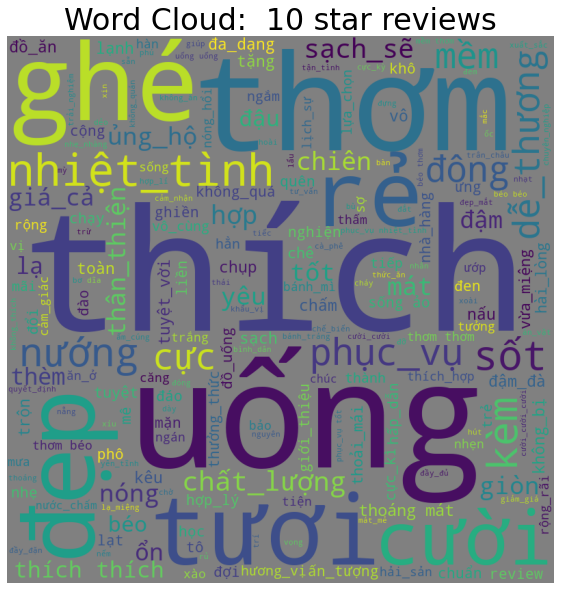

In [79]:
WordCloudForRating(data,10)

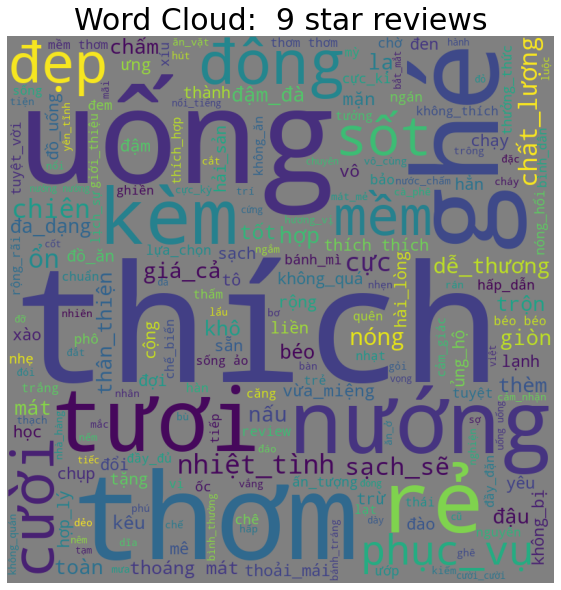

In [80]:
WordCloudForRating(data,9)

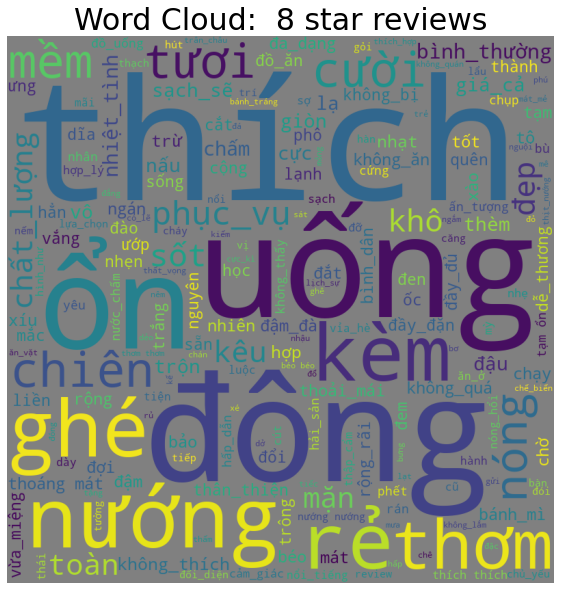

In [81]:
WordCloudForRating(data,8)

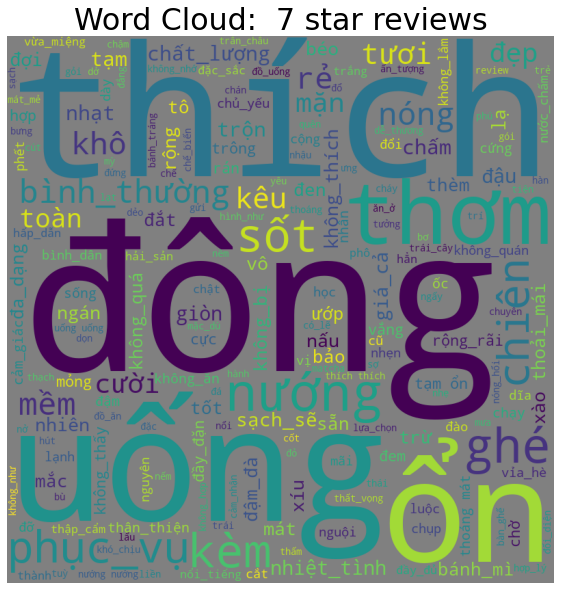

In [82]:
WordCloudForRating(data,7)

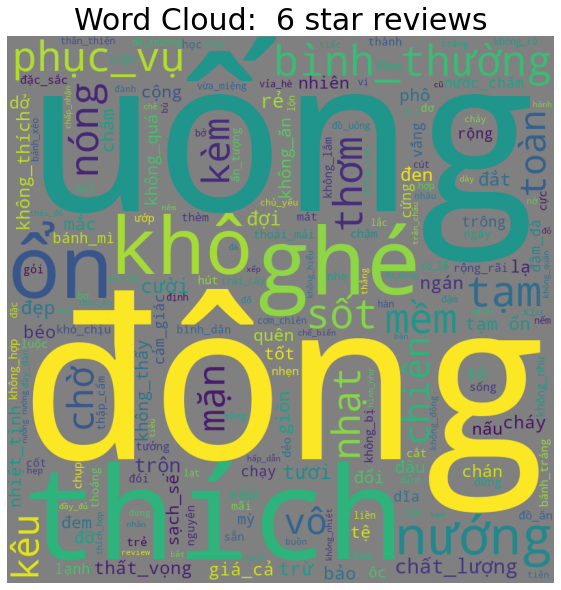

In [83]:
WordCloudForRating(data,6)

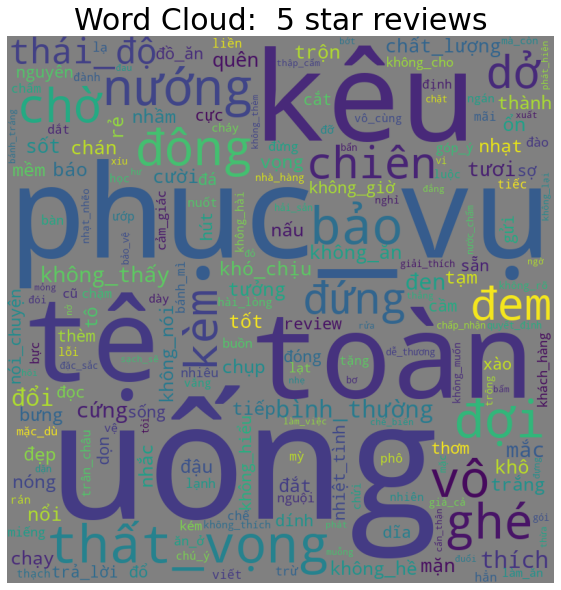

In [84]:
WordCloudForRating(data,5)

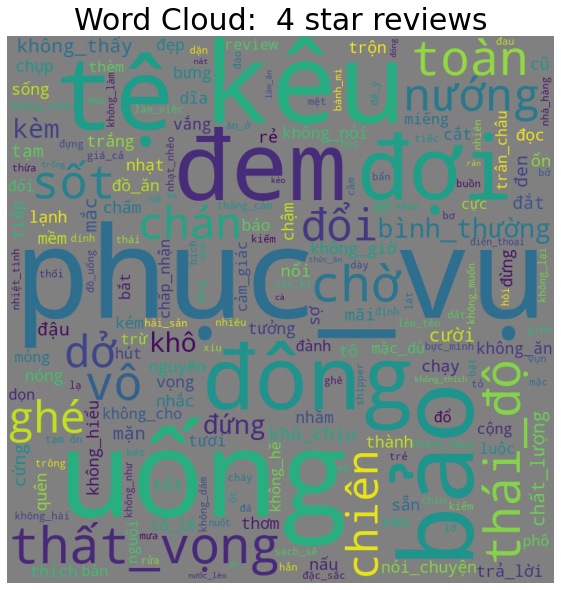

In [85]:
WordCloudForRating(data,4)

### Chúng ta có hệ thống rating 10 sao. sau khi xem word cloud từ 10 ->4 thì đưa ra quyết định chia rating làm 2 loại.
- Loại pos từ 7-10 sao
- Loại neg từ 1->6 sao

In [97]:
data.rating[data.rating<7]=0
data.rating[data.rating>=7]=1

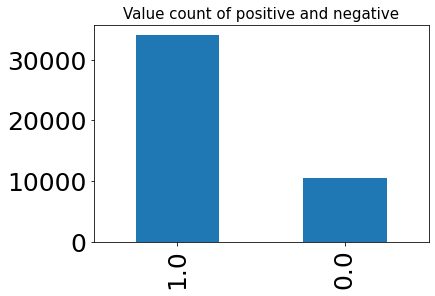

In [98]:
ax=data.rating.value_counts().plot(kind='bar')
plt.title("Value count of positive and negative",fontsize=15)
fig = ax.get_figure()
fig.savefig("rating_boolean.png");

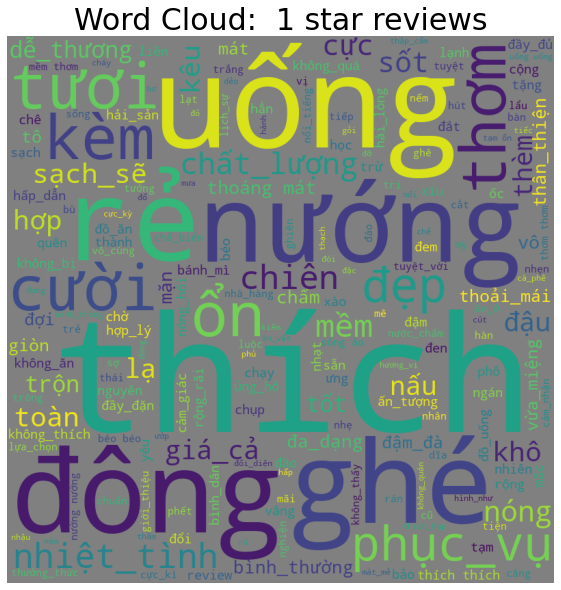

In [99]:
WordCloudForRating(data,1, 'rating')

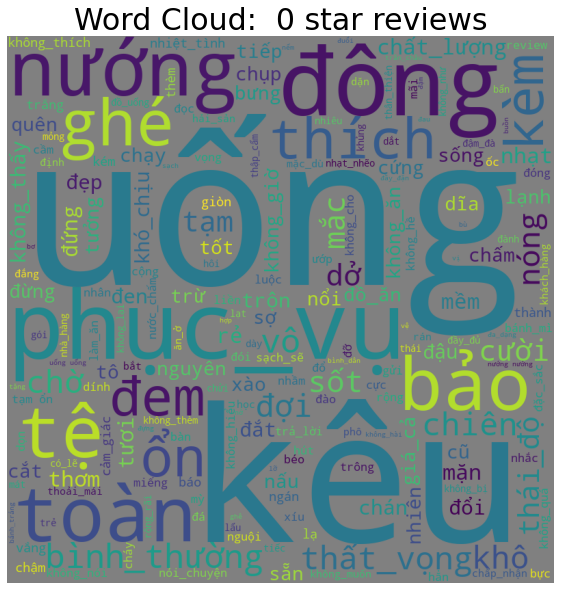

In [100]:
WordCloudForRating(data,0, 'rating')

### Bước 4&5: Modeling & Evaluation/ Analyze & Report 

In [101]:
X, y = train_test_split(data, test_size=.20, random_state=42)

In [102]:
X.shape, y.shape

((35585, 4), (8897, 4))

#### Try some classification algorithm(> 3)

In [103]:

accuracy_dict = dict()
classifier_dict = dict()

In [104]:
tfidfconverter = TfidfVectorizer(min_df=0.002)

# For train data - use fit_transform
X_train = tfidfconverter.fit_transform(X['comment']).toarray()
X_test = tfidfconverter.transform(y['comment'])

# Put 'rating' column of each dataframe into y
y_train = np.asarray(X['rating'])
y_test = np.asarray(y['rating'])

#### 1.Naive Bayes

In [105]:
start_time = time.time()

# Train and Predict the data using Multinomial Naive Bayes
multinomialNB = MultinomialNB(alpha=1)
multinomialNB.fit(X_train, y_train)
classifier_dict["Multinomial Naive Bayes"] = multinomialNB;
y_pred_mnb_test = multinomialNB.predict(X_test)

# Calculate the Accuracy
accuracy_mnb_test = accuracy_score(y_test, y_pred_mnb_test)*100

# Print the Accuracy
print("Using Multinomial Naive Bayes:")
print("Accuracy:", accuracy_mnb_test)

# Store the Accuracy in dictionaries
accuracy_dict["Multinomial Naive Bayes"] = accuracy_mnb_test;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Multinomial Naive Bayes:
Accuracy: 83.7473305608632
runtime: 0.15011811256408691 sec


In [106]:
cm = confusion_matrix(y_test, y_pred_mnb_test)
print(cm)

[[ 793 1333]
 [ 113 6658]]


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

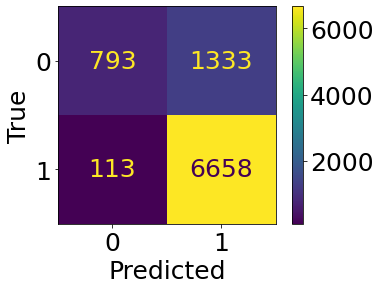

In [107]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [108]:
print(classification_report(y_test,y_pred_mnb_test))

              precision    recall  f1-score   support

         0.0       0.88      0.37      0.52      2126
         1.0       0.83      0.98      0.90      6771

    accuracy                           0.84      8897
   macro avg       0.85      0.68      0.71      8897
weighted avg       0.84      0.84      0.81      8897



#### Sau khi chạy xong 1 model thì phần predict bị sai khá nhiều. Recall chỉ có 40% chứng tỏ model không đạt kì vọng. 
#### Chúng ta thấy rõ ràng có sự mất căng bằng giữa nhận xét tích cực và nhận xét tiêu cực. Chúng ta thử cân bằng dữ liệu lại xem sao

In [109]:
count_class_1, count_class_0 = data.rating.value_counts()

# Divide by class
df_class_0 = data[data['rating'] == 0]
df_class_1 = data[data['rating'] == 1]
count_class_0, count_class_1

(10446, 34036)

Random under-sampling:
0.00    10446
1.00    10446
Name: rating, dtype: int64


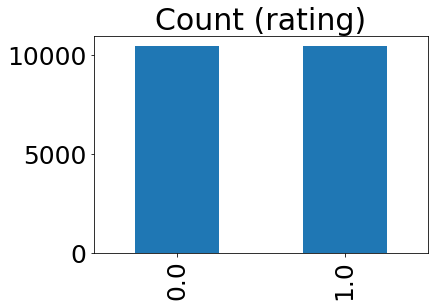

In [110]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_under.rating.value_counts())

df_test_under.rating.value_counts().plot(kind='bar', title='Count (rating)');

In [111]:
df_save = df_test_under[['rating', 'comment']]
df_save.to_csv('final_under_sampling.csv', encoding='utf-8')

In [112]:
df_test_under = pd.read_csv('final_under_sampling.csv', encoding='utf-8').drop(["Unnamed: 0"], axis = 1)
df_test_under.head()

rating                                            comment
0    1.00  rẻ chất_lượng đóng_gói cẩn_thận mùi_vị đợi giò...
1    1.00              mềm hàn thơm tuyệt kèm giòn thơm quên
2    1.00  thèm lá_lốt nướng kèm kêu dĩa lết nướng thơm m...
3    1.00                                               uống
4    1.00                    mưa rẻ nổi quên đông không_rộng

In [113]:
df_test_under.comment=df_test_under.comment.astype(str)

In [114]:
df_test_under['rating'] = df_test_under['rating'].replace([1],"Positive")
df_test_under['rating'] = df_test_under['rating'].replace([0],"Negative")

In [115]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20892 entries, 0 to 20891
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   20892 non-null  object
 1   comment  20892 non-null  object
dtypes: object(2)
memory usage: 326.6+ KB


In [116]:
X, y = train_test_split(df_test_under, test_size=.20, random_state=42)

In [117]:
X.shape, y.shape

((16713, 2), (4179, 2))

In [118]:
# For train data - use fit_transform
X_train = tfidfconverter.fit_transform(X['comment']).toarray()
X_test = tfidfconverter.transform(y['comment'])

# Put 'rating' column of each dataframe into y
y_train = np.asarray(X['rating'])
y_test = np.asarray(y['rating'])

In [119]:
start_time = time.time()

# Train and Predict the data using Multinomial Naive Bayes
multinomialNB = MultinomialNB(alpha=1)
multinomialNB.fit(X_train, y_train)
classifier_dict["Multinomial Naive Bayes"] = multinomialNB;
y_pred_mnb_test = multinomialNB.predict(X_test)

# Calculate the Accuracy
accuracy_mnb_test = accuracy_score(y_test, y_pred_mnb_test)*100

# Print the Accuracy
print("Using Multinomial Naive Bayes:")
print("Accuracy:", accuracy_mnb_test)

# Store the Accuracy in dictionaries
accuracy_dict["Multinomial Naive Bayes"] = accuracy_mnb_test;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Multinomial Naive Bayes:
Accuracy: 78.27231395070591
runtime: 0.1453227996826172 sec


In [120]:
y_pred_mnb_test

array(['Negative', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype='<U8')

In [121]:
cm = confusion_matrix(y_test, y_pred_mnb_test)
print(cm)

[[1565  486]
 [ 422 1706]]


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

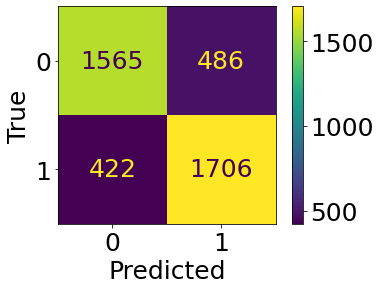

In [122]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [123]:
print(classification_report(y_test,y_pred_mnb_test))

              precision    recall  f1-score   support

    Negative       0.79      0.76      0.78      2051
    Positive       0.78      0.80      0.79      2128

    accuracy                           0.78      4179
   macro avg       0.78      0.78      0.78      4179
weighted avg       0.78      0.78      0.78      4179



#### 2.SVM classifier

In [124]:
start_time = time.time()

# Train and Predict the data using Linear SVM (C=1)
linearSVC1 = LinearSVC(C=1, dual=False)
linearSVC1.fit(X_train, y_train)
classifier_dict["Linear SVC (C=1)"] = linearSVC1;
y_pred_lsvc = linearSVC1.predict(X_test)

# Calculate the Accuracy
accuracy_lsvc1_test = accuracy_score(y_test, y_pred_lsvc)*100

# Print the Accuracy
print("Using Linear SVC (C=1):")
print('Accuracy:', accuracy_lsvc1_test)

# Store the Accuracy in dictionaries
accuracy_dict["Linear SVC (C=1)"] = accuracy_lsvc1_test;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Linear SVC (C=1):
Accuracy: 77.74587221823403
runtime: 0.18045783042907715 sec


In [125]:
cm_svm = confusion_matrix(y_test, y_pred_lsvc)
print(cm_svm)

[[1621  430]
 [ 500 1628]]


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

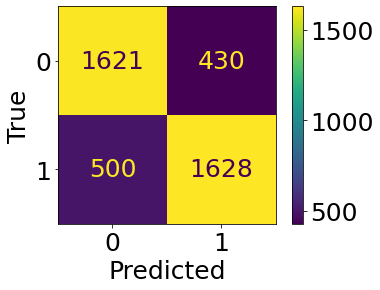

In [126]:
cmd_svm = ConfusionMatrixDisplay(cm_svm)
cmd_svm.plot()
cmd_svm.ax_.set(xlabel='Predicted', ylabel='True')

In [127]:
print(classification_report(y_test,y_pred_lsvc))

              precision    recall  f1-score   support

    Negative       0.76      0.79      0.78      2051
    Positive       0.79      0.77      0.78      2128

    accuracy                           0.78      4179
   macro avg       0.78      0.78      0.78      4179
weighted avg       0.78      0.78      0.78      4179



In [128]:
start_time = time.time()

# Train and Predict the data using Linear SVM (C=100)
linearSVC100 = LinearSVC(C=100, dual=False)
linearSVC100.fit(X_train, y_train)
classifier_dict["Linear SVC (C=100)"] = linearSVC100;
y_pred_lsvc = linearSVC100.predict(X_test)

# Calculate the Accuracy
accuracy_lsvc100_test = accuracy_score(y_test, y_pred_lsvc)*100

# Print the Accuracy
print("Using Linear SVC (C=100):")
print('Accuracy:', accuracy_lsvc100_test)

# Store the Accuracy in dictionaries
accuracy_dict["Linear SVC (C=100)"] = accuracy_lsvc100_test;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Linear SVC (C=100):
Accuracy: 77.55443886097152
runtime: 0.22725892066955566 sec


In [129]:
cm_svm100 = confusion_matrix(y_test, y_pred_lsvc)
print(cm_svm100)

[[1618  433]
 [ 505 1623]]


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

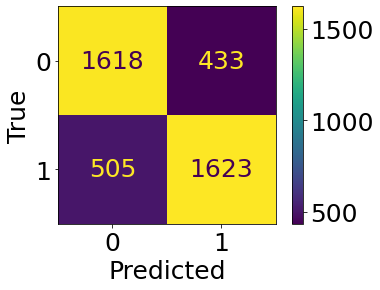

In [130]:
cmd_svm100 = ConfusionMatrixDisplay(cm_svm100)
cmd_svm100.plot()
cmd_svm100.ax_.set(xlabel='Predicted', ylabel='True')

In [131]:
print(classification_report(y_test,y_pred_lsvc))

              precision    recall  f1-score   support

    Negative       0.76      0.79      0.78      2051
    Positive       0.79      0.76      0.78      2128

    accuracy                           0.78      4179
   macro avg       0.78      0.78      0.78      4179
weighted avg       0.78      0.78      0.78      4179



In [132]:
start_time = time.time()

# Train and Predict the data using Linear SVM (C=1000)
linearSVC1000 = LinearSVC(C=1000, dual=False)
linearSVC1000.fit(X_train, y_train)
classifier_dict["Linear SVC (C=1000)"] = linearSVC1000;
y_pred_lsvc = linearSVC1000.predict(X_test)

# Calculate the Accuracy
accuracy_lsvc1000_test = accuracy_score(y_test, y_pred_lsvc)*100

# Print the Accuracy
print("Using Linear SVC (C=1000):")
print('Accuracy:', accuracy_lsvc1000_test)

# Store the Accuracy in dictionaries
accuracy_dict["Linear SVC (C=1000)"] = accuracy_lsvc1000_test;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Linear SVC (C=1000):
Accuracy: 77.55443886097152
runtime: 0.23103737831115723 sec


In [133]:
cm_svm1000 = confusion_matrix(y_test, y_pred_lsvc)
print(cm_svm1000)

[[1618  433]
 [ 505 1623]]


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

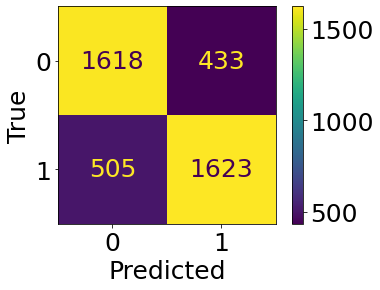

In [134]:
cmd_svm1000 = ConfusionMatrixDisplay(cm_svm1000)
cmd_svm1000.plot()
cmd_svm1000.ax_.set(xlabel='Predicted', ylabel='True')

In [135]:
print(classification_report(y_test,y_pred_lsvc))

              precision    recall  f1-score   support

    Negative       0.76      0.79      0.78      2051
    Positive       0.79      0.76      0.78      2128

    accuracy                           0.78      4179
   macro avg       0.78      0.78      0.78      4179
weighted avg       0.78      0.78      0.78      4179



#### 3.RandomForest Classifier

In [136]:
start_time = time.time()

# Train and Predict the data using Random Forest Classifier (n_estimators=10)
randomForest10 = RandomForestClassifier(max_depth=100, n_estimators=10, max_features=1)
randomForest10.fit(X_train, y_train)
classifier_dict["Random Forest Classifier (n_estimators=10)"] = randomForest10;
y_pred_rfc = randomForest10.predict(X_test)

# Calculate the Accuracy
accuracy_rfc10_test = accuracy_score(y_test, y_pred_rfc)*100

# Print the  and Accuracy
print("Using Random Forest Classifier:")

print('Accuracy:', accuracy_rfc10_test)

# Store the Accuracy in dictionaries
accuracy_dict["Random Forest Classifier (n_estimators=10)"] = accuracy_rfc10_test;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Random Forest Classifier:
Accuracy: 67.19310839913855
runtime: 0.5601587295532227 sec


In [137]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc)

[[1456  595]
 [ 776 1352]]


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

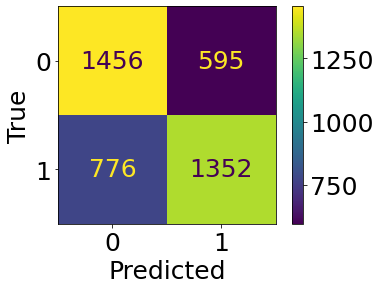

In [138]:
cmd_rfc = ConfusionMatrixDisplay(cm_rfc)
cmd_rfc.plot()
cmd_rfc.ax_.set(xlabel='Predicted', ylabel='True')

In [139]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

    Negative       0.65      0.71      0.68      2051
    Positive       0.69      0.64      0.66      2128

    accuracy                           0.67      4179
   macro avg       0.67      0.67      0.67      4179
weighted avg       0.67      0.67      0.67      4179



In [140]:
start_time = time.time()

# Train and Predict the data using RandomForestClassifier (n_estimators=50)
randomForest50 = RandomForestClassifier(max_depth=100, n_estimators=50, max_features=1)
randomForest50.fit(X_train, y_train)
classifier_dict["Random Forest Classifier (n_estimators=50)"] = randomForest50;
y_pred_rfc = randomForest50.predict(X_test)

# Calculate the Accuracy
accuracy_rfc50_test = accuracy_score(y_test, y_pred_rfc)*100

# Print the Accuracy
print("Using Random Forest Classifier (n_estimators=50):")
print('Accuracy:', accuracy_rfc50_test)

# Store the Accuracy in dictionaries
accuracy_dict["Random Forest Classifier (n_estimators=50)"] = accuracy_rfc50_test;

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

Using Random Forest Classifier (n_estimators=50):
Accuracy: 75.20938023450586
runtime: 3.166317939758301 sec


In [141]:
cm_rfc50 = confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc50)

[[1581  470]
 [ 566 1562]]


[Text(0, 0.5, 'True'), Text(0.5, 0, 'Predicted')]

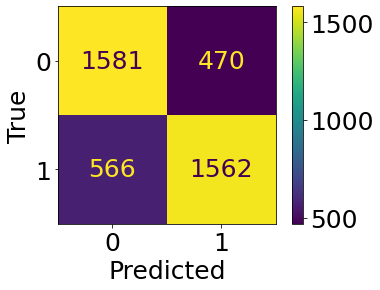

In [142]:
cmd_rfc50 = ConfusionMatrixDisplay(cm_rfc50)
cmd_rfc50.plot()
cmd_rfc50.ax_.set(xlabel='Predicted', ylabel='True')

In [143]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

    Negative       0.74      0.77      0.75      2051
    Positive       0.77      0.73      0.75      2128

    accuracy                           0.75      4179
   macro avg       0.75      0.75      0.75      4179
weighted avg       0.75      0.75      0.75      4179



### 4.Comparing the accuracies of all the classifiers

In [144]:
accuracy_dict_list = sorted(accuracy_dict.items(), key=operator.itemgetter(1), reverse=True)
accuracy_dict_list

[('Multinomial Naive Bayes', 78.27231395070591),
 ('Linear SVC (C=1)', 77.74587221823403),
 ('Linear SVC (C=100)', 77.55443886097152),
 ('Linear SVC (C=1000)', 77.55443886097152),
 ('Random Forest Classifier (n_estimators=50)', 75.20938023450586),
 ('Random Forest Classifier (n_estimators=10)', 67.19310839913855)]

[(0.0, 80.27231395070591)]

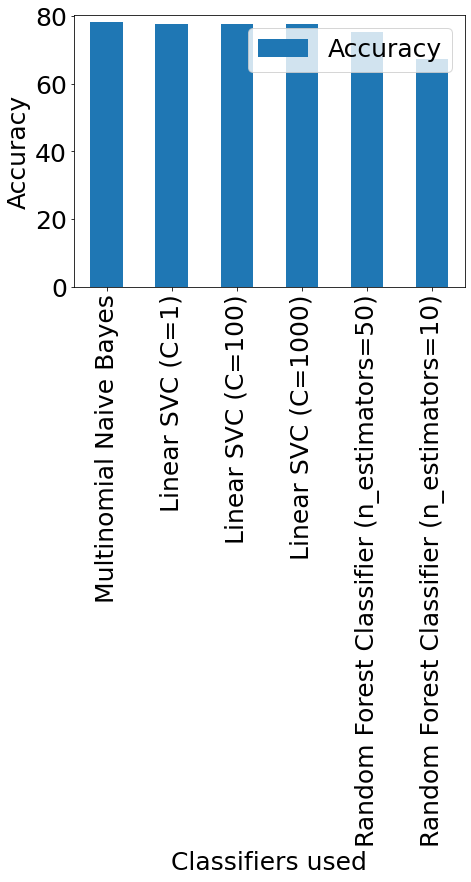

In [145]:
graph_accuracy_list = [item[1] for item in accuracy_dict_list]
graph_classifier_list = [item[0] for item in accuracy_dict_list]

minY = 0;
maxY = max(graph_accuracy_list)

df = pd.DataFrame({'Accuracy': graph_accuracy_list}, index=graph_classifier_list)
ax = df.plot(figsize=(7,5), kind='bar', stacked=True)

ax. set(xlabel="Classifiers used", ylabel="Accuracy")

ax.set(ylim=[minY, maxY+2])

In [146]:
highest_accuracy_classifier = accuracy_dict_list[0]
print("Best Classifier considering highest accuracy:", highest_accuracy_classifier)

Best Classifier considering highest accuracy: ('Multinomial Naive Bayes', 78.27231395070591)


In [147]:
best_classifier_name = accuracy_dict_list[0][0]
bestClassifier = classifier_dict.get(best_classifier_name)
print(bestClassifier)

MultinomialNB(alpha=1)


In [148]:
#input_review = input('Enter your review: ') 
input_review = 'Ngon nhưng dạo này chất lượng đồ ăn giảm trong khi giá lên'
mcom = {'comment': [input_review]}
mdf = pd.DataFrame(mcom, columns = ['comment'])
X_single = tfidfconverter.transform(mdf['comment'])
y_single = bestClassifier.predict(X_single)
print("review: ", y_single[0])
if y_single == 'Positive':
    print('positive review')
else:
    print('Negative')

review:  Positive
positive review


#### 5.Sử dụng thêm lazy predict

In [149]:
source = df_test_under['comment']
type(source)

pandas.core.series.Series

In [150]:
text_data = np.array(source)
text_data

array(['rẻ chất_lượng đóng_gói cẩn_thận mùi_vị đợi giòn mỏng ủng_hộ',
       'mềm hàn thơm tuyệt kèm giòn thơm quên',
       'thèm lá_lốt nướng kèm kêu dĩa lết nướng thơm mềm không_bở nướng thơm mặn gọn chiều_tối tâm',
       ...,
       'lạnhmặc áo_khoác ăngọi khô đợi không_thấy đứng dậy không_cho khàn_khàn tốt',
       'tăng_bạt_hổ bánh_hơi cứng mắc mắc',
       'bạch công_việc ghé vô uống chờ rước lý_tưởng mát_mẻ yên_bình tệ không_chuyên nghiệp phục_vụ đợi uống kêu toán uống bình_thường tạm mắc'],
      dtype=object)

In [151]:
count = CountVectorizer(max_features=1000)
count.fit(text_data)
bag_of_words = count.transform(text_data)
bag_of_words

<20892x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 168582 stored elements in Compressed Sparse Row format>

In [152]:
X1 = bag_of_words.toarray()
X1

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [153]:
y1 = np.array(df_test_under.rating)

In [154]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20) 

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X1_train, X1_test, y1_train, y1_test)

 59%|█████▊    | 17/29 [10:45<04:12, 21.01s/it]

In [ ]:
models

#### Thử dùng BernoulliNB theo đề xuất của lazy predict

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
start_time = time.time()
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred_near = clf.predict(X_test)

# Calculate the Accuracy
accuracy_near_test = accuracy_score(y_test, y_pred_near)*100

# Print the Accuracy
print("Using BernoulliNB:")
print('Accuracy:', accuracy_near_test)
end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

In [ ]:
cm_near = confusion_matrix(y_test, y_pred_near)
print(cm_near)

In [ ]:
cmd_near = ConfusionMatrixDisplay(cm_near)
cmd_near.plot()
cmd_near.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
print(classification_report(y_test,y_pred_near))

### Theo đề xuất của lazy predict thì kết quả chúng ta thấy có tốt với mô hình ở trên. Tuy Accuracy là 83% nhưng recall của negative là 87%. Chúng ta sẽ chọn BernoulliNB

### Thử cân bằng dữ liệu bằng cách over sampling

In [ ]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

In [ ]:
df_test_over.info

In [ ]:
print('Random over-sampling:')
print(df_test_over.rating.value_counts())

df_test_over.rating.value_counts().plot(kind='bar', title='Count (rating)');

In [ ]:
df_save_over = df_test_over[['rating', 'comment']]
df_save_over.to_csv('final_over_sampling.csv', encoding='utf-8')

In [ ]:
df_test_over = pd.read_csv('final_over_sampling.csv', encoding='utf-8').drop(["Unnamed: 0"], axis = 1)
df_test_over.head()

In [ ]:
df_test_over.comment=df_test_over.comment.astype(str)

In [ ]:
df_test_over['rating'] = df_test_over['rating'].replace([1],"Positive")
df_test_over['rating'] = df_test_over['rating'].replace([0],"Negative")

In [ ]:
df_test_over.info()

In [ ]:
X, y = train_test_split(df_test_over, test_size=.20, random_state=42)

In [ ]:
X.shape, y.shape

In [ ]:
# For train data - use fit_transform
tfidfconverter = TfidfVectorizer(min_df=0.002)
X_train = tfidfconverter.fit_transform(X['comment']).toarray()
X_test = tfidfconverter.transform(y['comment'])

# Put 'rating' column of each dataframe into y
y_train = np.asarray(X['rating'])
y_test = np.asarray(y['rating'])

In [ ]:
start_time = time.time()

clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

# Calculate the Accuracy
accuracy_mnb_test = accuracy_score(y_test, y_pred_test)*100

# Print the Accuracy
print("Using BernoulliNB:")
print("Accuracy:", accuracy_mnb_test)

end_time = time.time()
print("runtime: %s sec" % (end_time - start_time))

In [ ]:
y_pred_test

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

In [ ]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [ ]:
print(classification_report(y_test,y_pred_test))

### Kết luân sau khi cân bằng dữ liệu bằng cách over sampling thì kết quả thu được tương tự cách under sampling. Với các thông số như recall là 87%, accuracy 83%. Tuy nhiên thời gian thực hiện lâu hơn với bộ dữ liệu lớn hơn cách cân bằng under sampling.

## 5.Conclusion

## Kết luận cuối cùng chúng ta xử dụng thuật toán BernoulliNB với bộ dữ liệu sau khi đã cân bằng với under sampling.